In [27]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!ls "/content/drive/My Drive"

 AamirDarukhanawalla_Resume.pdf
 AtharvaKamat_InternshalaResume.pdf
 cg_3.docx
 circularq.txt
 circularq.txt.gdoc
'Colab Notebooks'
 Copy-of-NoddyAndFriends.pptx
'crc (1).gdoc'
'crc (2).gdoc'
'crc (3).gdoc'
 crc.docx
 crc.gdoc
 dark_web.docx
 dark_web.gdoc
'Document from Atharva kamat'
 DSC05958.JPG
 DSC05959.JPG
 DSC05960.JPG
 DSC05961.JPG
 DSC05962.JPG
 DSC05963.JPG
 DSC05964.JPG
 DSC05965.JPG
 DSC05966.JPG
 DSC05967.JPG
 DSC05968.JPG
 DSC05969.JPG
 DSC05970.JPG
 DSC05971.JPG
 DSC05972.JPG
 DSC05973.JPG
 DSC05974.JPG
 DSC05975.JPG
 DSC05976.JPG
 DSC05977.JPG
 DSC05978.JPG
'|| Engineering Hallticket ||'
'|| Engineering Hallticket || (1).pdf'
'__ Engineering Hallticket __ (1).pdf'
'|| Engineering Hallticket2 ||'
'|| Engineering Hallticket2 ||.gdoc'
'|| Engineering Hallticket || (2).pdf'
'|| Engineering Hallticket |2|.pdf'
'|| Engineering Hallticket 5||.pdf'
'|| Engineering Hallticket ||.gdoc'
'|| Engineering Hallticket ||.pdf'
 EXP10.gdoc
 EXP4.docx
 EXP5.docx
 EXP5.gdoc
'EXP8 (1).gdoc

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

In [0]:
df_train=pd.read_csv("/content/drive/My Drive/train.csv")

In [31]:
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_test=pd.read_csv("/content/drive/My Drive/test.csv")
df_test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train=(df_train.iloc[:,1:].values).astype('float32')

In [0]:
y_train=(df_train.iloc[:,0].values).astype('int32')

In [0]:
X_test = df_test.values.astype('float32')

In [36]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

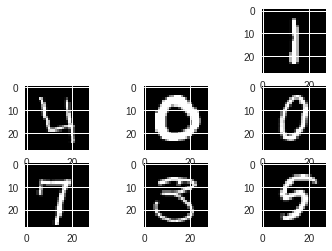

In [37]:

for i in range(2, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [39]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [0]:
meanPixel = X_train.mean().astype(np.float32)

In [0]:
stdPixel = X_train.std().astype(np.float32)

In [0]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)


In [0]:
num_class=y_train.shape[1]

([<matplotlib.axis.XTick at 0x7fa4dbb1ada0>,
 <a list of 10 Text xticklabel objects>)

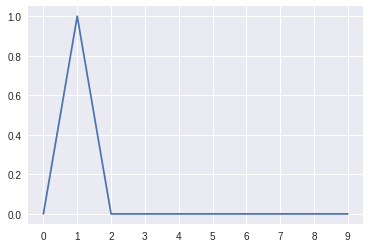

In [44]:
plt.plot(y_train[15])
plt.xticks(range(10))

In [0]:
from keras.models import Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [0]:
def standardize(x):
  return (x-meanPixel)/stdPixel

In [0]:
model = Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [0]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [0]:
#split
from sklearn.model_selection import train_test_split

X=X_train
y=y_train

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2)

In [0]:
batches=gen.flow(X_train,y_train,batch_size=64)
val_batches=gen.flow(X_val,y_val,batch_size=64)

In [52]:
history = model.fit_generator(generator=batches,steps_per_epoch=batches.n,
                              epochs=2,validation_data=val_batches,
                              validation_steps=val_batches.n)

Epoch 1/2
33600/33600 [==============================] - 119s 4ms/step - loss: 0.5552 - acc: 0.9269 - val_loss: 0.8498 - val_acc: 0.9103
Epoch 2/2
33600/33600 [==============================] - 117s 3ms/step - loss: 0.4934 - acc: 0.9459 - val_loss: 0.9899 - val_acc: 0.9136


In [55]:
model.optimizer.lr=0.01
batches=gen.flow(X,y,batch_size=64)
history=model.fit_generator(generator=batches,steps_per_epoch=batches.n,epochs=2)

Epoch 1/2
42000/42000 [==============================] - 181s 4ms/step - loss: 0.5551 - acc: 0.9462
Epoch 2/2
42000/42000 [==============================] - 182s 4ms/step - loss: 0.5229 - acc: 0.9515


In [0]:
predictions=model.predict_classes(X_test,verbose=0)
submissions=pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),"Label":predictions})

submissions.to_csv("normalnn.csv",index=False,header=True)